In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

### Users dataset

In [32]:
#Import dataset from spreadsheet
user_url = 'https://docs.google.com/spreadsheets/d/17n053_7FjEEhL3G8I7DITSFeIfcjgBa0fRr53x-SR2g/edit#gid=0'
user_url_replace = user_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

#Load Users Dataset URL
print(user_url_replace) #To show the link to csv
user = pd.read_csv(user_url_replace) #to load/read the csv into pandas dataframe

#Show only first 5 rows
user.head()

https://docs.google.com/spreadsheets/d/17n053_7FjEEhL3G8I7DITSFeIfcjgBa0fRr53x-SR2g/export?format=csv&gid=0


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


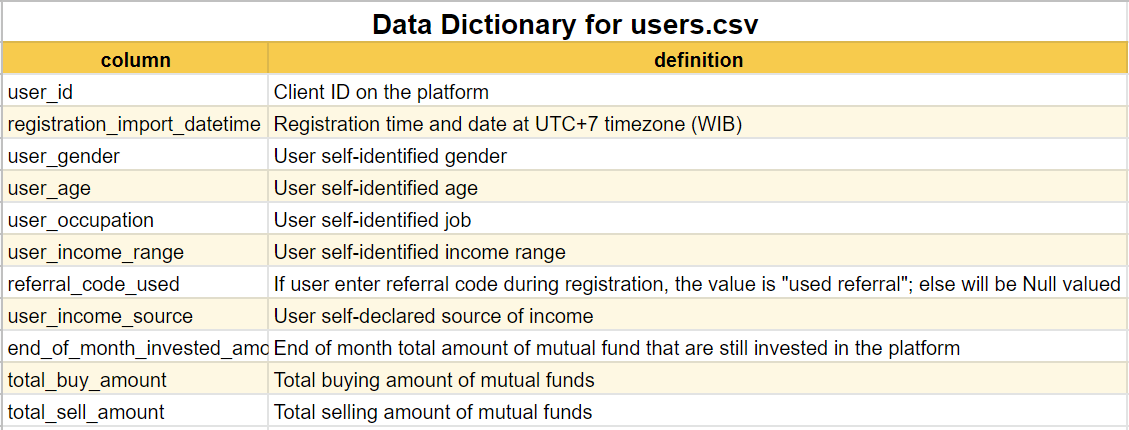

### Daily User Transaction dataset

In [33]:
#Import dataset from spreadsheet
user_url = 'https://docs.google.com/spreadsheets/d/1b3DAli5xsR39nNL06IGvzhbEdOJkcvxpLKvhWUf9tYc/edit#gid=0'
user_url_replace = user_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

#Load Users Dataset URL
print(user_url_replace) #To show the link to csv
transaction = pd.read_csv(user_url_replace) #to load/read the csv into pandas dataframe

#Show only first 5 rows
transaction.head(5)

https://docs.google.com/spreadsheets/d/1b3DAli5xsR39nNL06IGvzhbEdOJkcvxpLKvhWUf9tYc/export?format=csv&gid=0


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


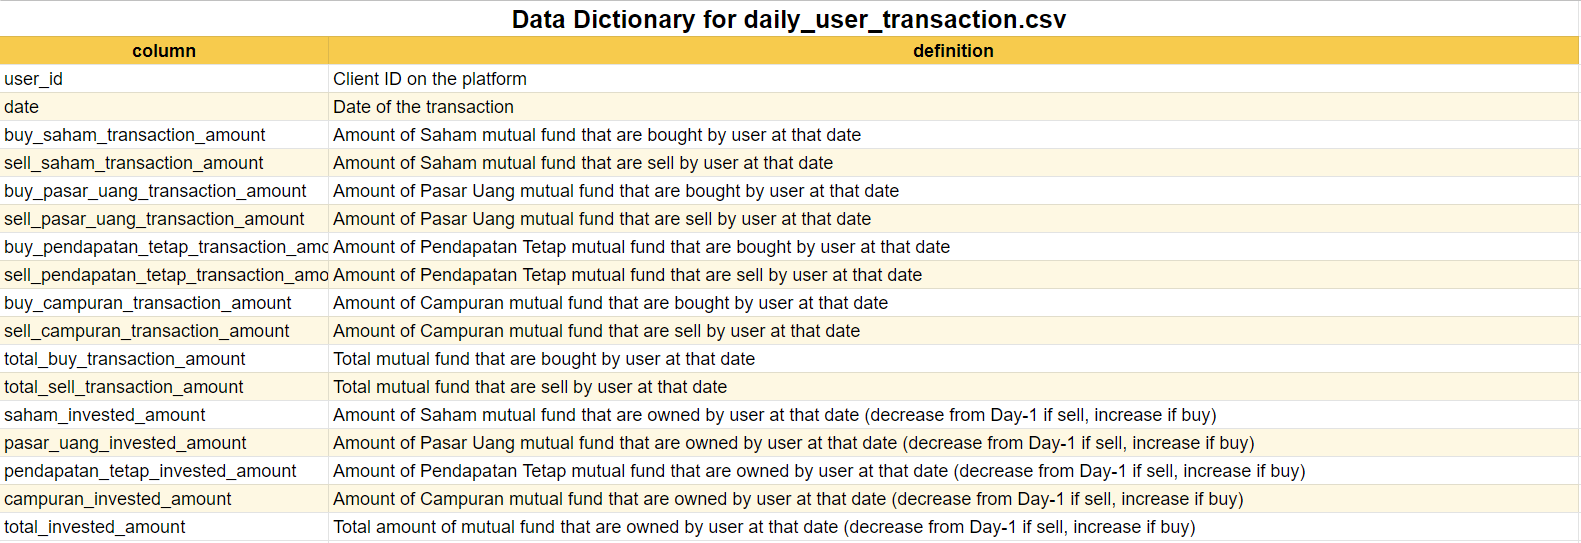

In [34]:
transaction['user_id'].nunique()

8277

In [35]:
saham = transaction['buy_saham_transaction_amount'].sum()
pu = transaction['buy_pasar_uang_transaction_amount'].sum()
pend = transaction['buy_pendapatan_tetap_transaction_amount'].sum()
cam = transaction['buy_campuran_transaction_amount'].sum()
tot = transaction['total_buy_transaction_amount'].sum()


print(saham)
print(pu)
print(pend)
print(cam)
print(tot)
print(len(transaction))

1590346630.0
3725638806.0
6551156971.0
531427002.0
12398569409
158811


In [36]:
transaction[transaction['total_sell_transaction_amount']<0]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
102,61414,2021-08-13,NaN,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-10000,0.0,NaN,NaN,NaN,0
196,71229,2021-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4300000.0,0,-4300000,NaN,NaN,NaN,700000.0,700000
213,71229,2021-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-700000.0,0,-700000,NaN,NaN,NaN,0.0,0
233,72676,2021-09-23,NaN,-20760.0,0.0,NaN,0.0,NaN,NaN,NaN,0,-20760,39240.0,10000.0,80000.0,NaN,129240
275,82753,2021-08-11,NaN,-120000.0,NaN,-10000.0,NaN,-20000.0,NaN,NaN,0,-150000,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158648,4151790,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158687,4154421,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158692,4154865,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158734,4157054,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0


In [37]:
#I drop all the sell columns and focus on user_id, date and buy columns only
#I'll make cohort based on users first purchase

filter = [word for word in transaction if 'sell' not in word and 'invested' not in word]

In [38]:
trx =transaction[filter]
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   user_id                                  158811 non-null  int64  
 1   date                                     158811 non-null  object 
 2   buy_saham_transaction_amount             99031 non-null   float64
 3   buy_pasar_uang_transaction_amount        122263 non-null  float64
 4   buy_pendapatan_tetap_transaction_amount  98916 non-null   float64
 5   buy_campuran_transaction_amount          5072 non-null    float64
 6   total_buy_transaction_amount             158811 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.5+ MB


In [39]:
trx.isna().sum()

,0
user_id,0
date,0
buy_saham_transaction_amount,59780
buy_pasar_uang_transaction_amount,36548
buy_pendapatan_tetap_transaction_amount,59895
buy_campuran_transaction_amount,153739
total_buy_transaction_amount,0


In [40]:
trx_full =trx.replace(0,np.nan,regex=True)

In [41]:
  trx_clean = trx_full[~trx_full['total_buy_transaction_amount'].isnull()]
  trx_clean.fillna(0)

,user_id,date,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,total_buy_transaction_amount
25,50961,2021-09-01,1000000.0,0.0,0.0,0.0,1000000.0
46,50961,2021-09-30,300000.0,600000.0,1200000.0,0.0,2100000.0
99,54759,2021-09-30,0.0,2000000.0,0.0,0.0,2000000.0
154,66145,2021-09-29,140000.0,0.0,0.0,0.0,140000.0
166,67251,2021-09-20,530000.0,100000.0,370000.0,0.0,1000000.0
...,...,...,...,...,...,...,...
158528,4147464,2021-09-30,20000.0,0.0,0.0,0.0,20000.0
158548,4148505,2021-09-30,100000.0,0.0,0.0,0.0,100000.0
158555,4148714,2021-09-30,10000.0,0.0,0.0,0.0,10000.0
158566,4149156,2021-09-30,100000.0,0.0,0.0,0.0,100000.0


In [42]:
trx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7808 entries, 25 to 158701
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   user_id                                  7808 non-null   int64  
 1   date                                     7808 non-null   object 
 2   buy_saham_transaction_amount             3471 non-null   float64
 3   buy_pasar_uang_transaction_amount        4426 non-null   float64
 4   buy_pendapatan_tetap_transaction_amount  4086 non-null   float64
 5   buy_campuran_transaction_amount          131 non-null    float64
 6   total_buy_transaction_amount             7808 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 746.0+ KB


## Cohort

In [43]:
# merge between trx data and users data to gain registrasion date per user from user dataset and

df_all = trx_clean.merge(user,how = 'inner',left_on=['user_id'],right_on = ['user_id'])

In [44]:
date_max = df_all['date'].max()
date_min = df_all['date'].min()
print('transaksi terlama ada di tanggal', date_min)
print('transaksi terbaru ada di tanggal', date_max,'\n')

transaksi terlama ada di tanggal 2021-08-05
transaksi terbaru ada di tanggal 2021-09-30 



In [45]:
b= df_all['user_id'].value_counts()
b[b>5]

,count
user_id,
3799250,24
3744487,22
3944381,19
1275820,19
3765807,16
...,...
3920341,6
3822491,6
3780936,6


Text(0, 0.5, 'quantity')

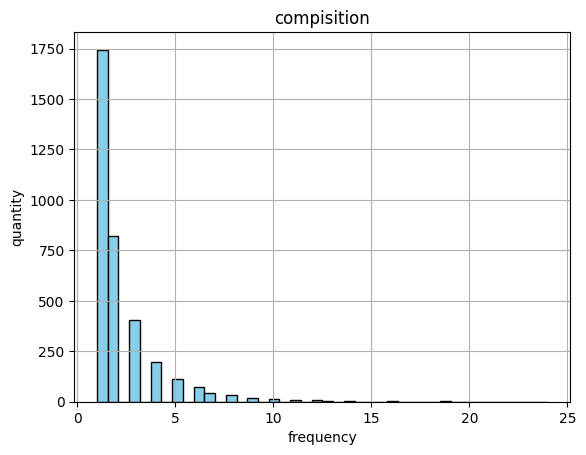

In [46]:
b.hist(bins =42,color='skyblue', edgecolor='black')
plt.title('compisition')
plt.xlabel('frequency')
plt.ylabel('quantity')

#from the graph below, we know that the data is balanced

In [47]:
## convert datetime in 'registration' to date

df_all['registration'] = pd.to_datetime(df_all['registration_import_datetime'])
df_all['regist'] = df_all['registration'].dt.strftime('%Y-%m-%d')

In [48]:
df_all['cohort_week'] = df_all['registration'].dt.strftime('%W')
coba= df_all[['user_id','cohort_week','regist']]
coba

,user_id,cohort_week,regist
0,50961,33,2021-08-20
1,50961,33,2021-08-20
2,54759,32,2021-08-11
3,66145,35,2021-09-02
4,67251,35,2021-09-01
...,...,...,...
7803,4147464,38,2021-09-26
7804,4148505,38,2021-09-26
7805,4148714,38,2021-09-26
7806,4149156,38,2021-09-26


In [49]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   user_id                                  7808 non-null   int64         
 1   date                                     7808 non-null   object        
 2   buy_saham_transaction_amount             3471 non-null   float64       
 3   buy_pasar_uang_transaction_amount        4426 non-null   float64       
 4   buy_pendapatan_tetap_transaction_amount  4086 non-null   float64       
 5   buy_campuran_transaction_amount          131 non-null    float64       
 6   total_buy_transaction_amount             7808 non-null   float64       
 7   registration_import_datetime             7808 non-null   object        
 8   user_gender                              7808 non-null   object        
 9   user_age                                 

In [50]:
df_all['date'] = pd.to_datetime(df_all['date'])

In [51]:
# make order week to complie number of order per user in every week. thus we can aggregate them to number orders/purchases per week

coba['order_week'] = df_all['date'].dt.to_period('W')
coba

<ipython-input-51-2309a7f59505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coba['order_week'] = df_all['date'].dt.to_period('W')


,user_id,cohort_week,regist,order_week
0,50961,33,2021-08-20,2021-08-30/2021-09-05
1,50961,33,2021-08-20,2021-09-27/2021-10-03
2,54759,32,2021-08-11,2021-09-27/2021-10-03
3,66145,35,2021-09-02,2021-09-27/2021-10-03
4,67251,35,2021-09-01,2021-09-20/2021-09-26
...,...,...,...,...
7803,4147464,38,2021-09-26,2021-09-27/2021-10-03
7804,4148505,38,2021-09-26,2021-09-27/2021-10-03
7805,4148714,38,2021-09-26,2021-09-27/2021-10-03
7806,4149156,38,2021-09-26,2021-09-27/2021-10-03


In [52]:
z = coba.groupby('user_id')['order_week']
coba['cohort'] = z.transform('min')
coba


<ipython-input-52-e0875ee23549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coba['cohort'] = z.transform('min')


,user_id,cohort_week,regist,order_week,cohort
0,50961,33,2021-08-20,2021-08-30/2021-09-05,2021-08-30/2021-09-05
1,50961,33,2021-08-20,2021-09-27/2021-10-03,2021-08-30/2021-09-05
2,54759,32,2021-08-11,2021-09-27/2021-10-03,2021-09-27/2021-10-03
3,66145,35,2021-09-02,2021-09-27/2021-10-03,2021-09-27/2021-10-03
4,67251,35,2021-09-01,2021-09-20/2021-09-26,2021-09-20/2021-09-26
...,...,...,...,...,...
7803,4147464,38,2021-09-26,2021-09-27/2021-10-03,2021-09-27/2021-10-03
7804,4148505,38,2021-09-26,2021-09-27/2021-10-03,2021-09-27/2021-10-03
7805,4148714,38,2021-09-26,2021-09-27/2021-10-03,2021-09-27/2021-10-03
7806,4149156,38,2021-09-26,2021-09-27/2021-10-03,2021-09-27/2021-10-03


In [53]:
df_cohort = coba.groupby(['cohort', 'order_week']).agg(n_customers=('user_id', 'nunique')).reset_index(drop=False)
df_cohort

,cohort,order_week,n_customers
0,2021-08-02/2021-08-08,2021-08-02/2021-08-08,37
1,2021-08-02/2021-08-08,2021-08-09/2021-08-15,19
2,2021-08-02/2021-08-08,2021-08-16/2021-08-22,8
3,2021-08-02/2021-08-08,2021-08-23/2021-08-29,10
4,2021-08-02/2021-08-08,2021-08-30/2021-09-05,10
5,2021-08-02/2021-08-08,2021-09-06/2021-09-12,10
6,2021-08-02/2021-08-08,2021-09-13/2021-09-19,4
7,2021-08-02/2021-08-08,2021-09-20/2021-09-26,6
8,2021-08-02/2021-08-08,2021-09-27/2021-10-03,7
9,2021-08-09/2021-08-15,2021-08-09/2021-08-15,181


In [54]:
from operator import attrgetter
df_cohort['period_number'] = (df_cohort.order_week - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_week,n_customers,period_number
0,2021-08-02/2021-08-08,2021-08-02/2021-08-08,37,0
1,2021-08-02/2021-08-08,2021-08-09/2021-08-15,19,1
2,2021-08-02/2021-08-08,2021-08-16/2021-08-22,8,2
3,2021-08-02/2021-08-08,2021-08-23/2021-08-29,10,3
4,2021-08-02/2021-08-08,2021-08-30/2021-09-05,10,4
5,2021-08-02/2021-08-08,2021-09-06/2021-09-12,10,5
6,2021-08-02/2021-08-08,2021-09-13/2021-09-19,4,6
7,2021-08-02/2021-08-08,2021-09-20/2021-09-26,6,7
8,2021-08-02/2021-08-08,2021-09-27/2021-10-03,7,8
9,2021-08-09/2021-08-15,2021-08-09/2021-08-15,181,0


In [55]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

In [56]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8
cohort,,,,,,,,,
2021-08-02/2021-08-08,37.0,19.0,8.0,10.0,10.0,10.0,4.0,6.0,7.0
2021-08-09/2021-08-15,181.0,52.0,47.0,38.0,43.0,38.0,29.0,30.0,NaN
2021-08-16/2021-08-22,325.0,96.0,118.0,97.0,66.0,60.0,65.0,NaN,NaN
2021-08-23/2021-08-29,405.0,154.0,124.0,86.0,79.0,93.0,NaN,NaN,NaN
2021-08-30/2021-09-05,534.0,172.0,107.0,91.0,124.0,NaN,NaN,NaN,NaN
2021-09-06/2021-09-12,570.0,153.0,109.0,112.0,NaN,NaN,NaN,NaN,NaN
2021-09-13/2021-09-19,489.0,155.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-20/2021-09-26,479.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-27/2021-10-03,486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
cohort_size = cohort_pivot.iloc[:, 0]

In [58]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

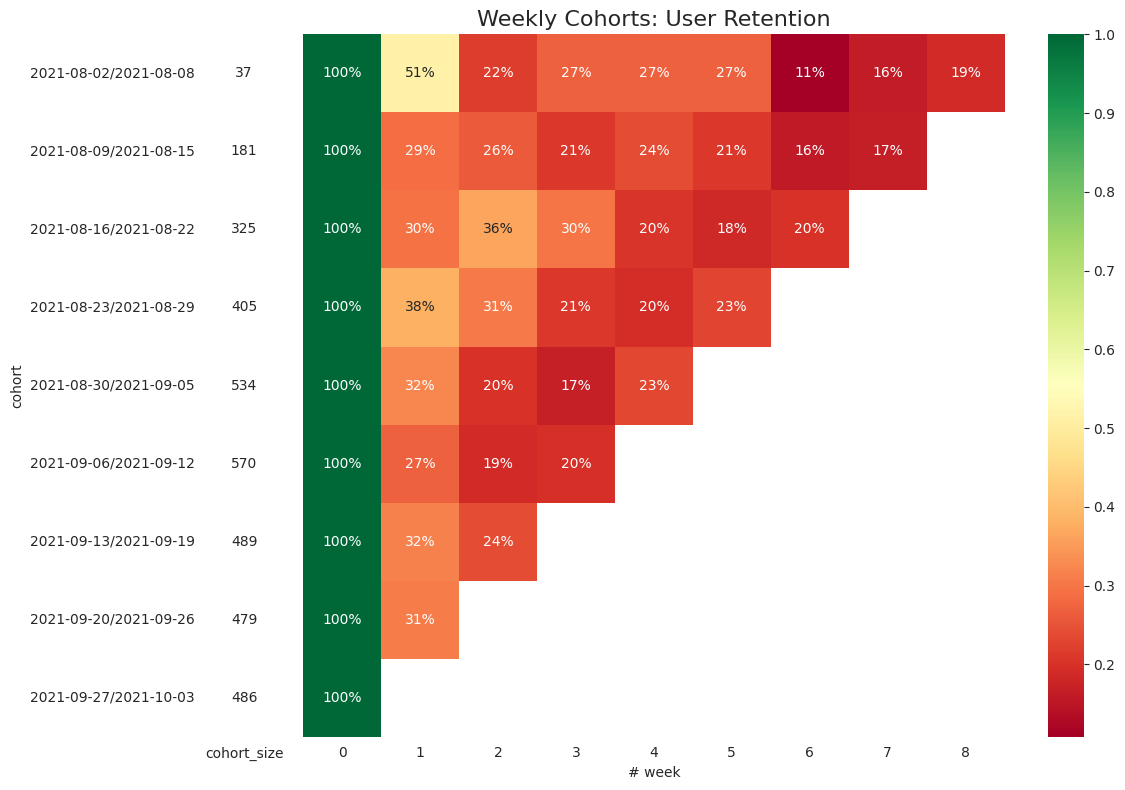

In [59]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Weekly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# week',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

From the graph above, we can conclude that only a third or a quarter of users continue to buy our product every week. The graph also shows that the lowest rate is 11%.